In [1]:
import torch
import matplotlib.pyplot as plt
import dotenv
import os
dotenv.load_dotenv()

from revert import models
from revert import infusion

# Pulse Encoder

In this notebook, we train an encoder $E : X \to Z$ to learn stable morphological features of ICP pulse waveforms. 
The latent pulse representation vector $z \in Z$ is invariant with respect to a certain set of _invariant_ (or _positive_) _augmentations_ acting on the input pulses $x \in X$, for instance:
- vertical shifts (mean ICP fluctuations),
- vertical scalings (pulse amplitude fluctuations),
- gaussian noise (measurement fluctuations),
- ...
- compositions of the above augmentations.

In [2]:
from revert import transforms

datadir   = os.environ['INFUSION_DATASETS']
data      = torch.load(os.path.join(datadir, 'baseline-no_shunt.pt'))

# Extracted pulses : [1174, 64, 128]
pulses    = data['pulses']
# Shuffled pulses  : [1174 * 64, 128]
dset      = transforms.Shuffle(0)(pulses.view([-1, 128]))
print('dataset shape :', list(dset.shape))

# Invariant augmentations 
from revert.transforms import VShift, VScale, Noise

T = [VShift(.7),
     VScale(1.2),
     Noise(.2),
     Noise(.1) @ VShift(.1) @ VScale(.1)]



dataset shape : [75136, 128]


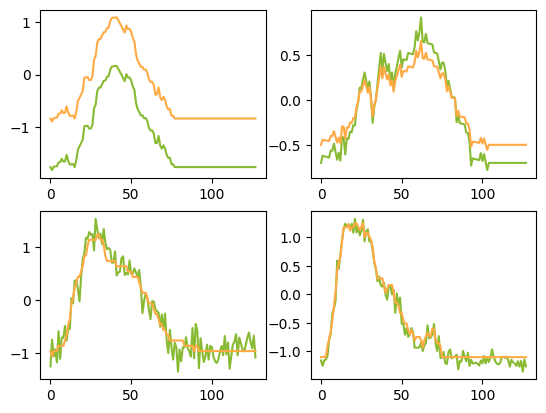

In [3]:
# Augmented DataLoader 
dset      = transforms.Shuffle(0)(pulses.view([-1, 128]))
loader = transforms.AugmentLoader(dset[:64], T, 4)
x_t = [x for x in loader]
x_t[0].shape

for i, xs in enumerate(x_t[0]):
    plt.subplot(2, 2, i+1)
    plt.plot(xs[1], color='#8b3')
    plt.plot(xs[0], color='#fa4')


In [4]:
help(loader)

Help on AugmentLoader in module revert.transforms.augmentations object:

class AugmentLoader(torch.utils.data.dataloader.DataLoader)
 |  AugmentLoader(dset, transforms, Nbatch=1, n=2, device='cpu', **kws)
 |  
 |  Method resolution order:
 |      AugmentLoader
 |      torch.utils.data.dataloader.DataLoader
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dset, transforms, Nbatch=1, n=2, device='cpu', **kws)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  augment(self, x)
 |  
 |  shuffle(self, x)
 |  
 |  to(self, device)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {}
 |  
 |  __parameters__ = ()
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from torch.utils.data.dataloader.DataLoader:
 |  
 |  __iter__(self) -> '_BaseDataLoaderIter'
 |      